#**BoW in Pyspark**


```
Nombre: Melanie Indira Sullca Peralta*
Codigo: 171070*
```




####*INSTALACION DE SPARK PARA USARLO EN COLAB* 

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://downloads.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop2.7.tgz

!tar -xvzf spark-3.2.0-bin-hadoop2.7.tgz

!pip install -q findspark

!pip install pyspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop2.7"

import findspark
findspark.init()


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [716 kB]
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Get:13

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master("local") \
        .appName("Hands-on PySpark on Google Colab") \
        .getOrCreate()

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .master("local") \
        .appName("Hands-on PySpark on Google Colab") \
        .getOrCreate()

spark

##*Comprobamos si la instalacion fue exitosa*

In [4]:
spark

##*Algoritmo TF-IDF*

In [ ]:
# cargamos el archivo proporcionado
archivo = open("twitts.txt")

In [ ]:
from pyspark.sql.types import *
from pyspark import SparkConf, SparkContext

# creamos el spark context
sc =SparkContext.getOrCreate()

data_i = [ fila for fila in archivo if fila != "\n"]
dataTwitts = []
for i in range(len(data_i)):
    data.append((i,data_i[i]))

fila = sc.parallelize(data)
fila.collect()

[(1, 'protester stage diein protest store nyc anger misplace retweet agree'),
 (2,
  'apple intraday comment update range premium user aapl stockaction trading stock mkt'),
 (3, 'ios app 2014 name elevate brain training iphone app'),
 (4, 'shit'),
 (5, 'founder attack boss ridiculous comment ad'),
 (6, 'evidence factcheckthis'),
 (7, 'educate'),
 (8, 'hard reach buy suicide squad comic_strip apple store turkey'),
 (9, 'delete music customer ipod'),
 (10,
  'apple intraday comment update range premium user aapl stockaction trading stock mkt'),
 (11, 'studio 45,000 outlet computer need battery future'),
 (12, 'apple great business aapl investwall aapl'),
 (13, 'dear love iphone plus lot great achievement iphone reboot day fail'),
 (14,
  'survey feedback iwatch positioning fashion accessory geek centric gadget'),
 (15, 'similar cloud backup picture onlinefootprint modicumofprudence'),
 (16, 'protester stage diein protest store nyc anger misplace retweet agree'),
 (17, 'fuck make shit pro

##*Filtrar lineas vacias*

In [ ]:
# Use /n para identificar una línea en blanco y luego filtrar los datos en esta línea
#dataTwitts= dataTwitts\
#    .map(lambda x: (x[0], '\n' if len(x[2]) == 0 else x[1], x[2]))\
#    .filter(lambda x: x[1] != '\n')

###*-Asignamos el par clave_valor anterior a un nuevo par clave_valor. Aquí, la clave será el token y su valor será el identificador TF del documento para ese token junto con un contador de 1. Este aquí indica la presencia de una palabra en el identificador del documento asociado con eso*

###*-Reducimos : Agrupamos los pares clave- valor con la clave común y agregaremos los valores de la misma clave para obtener la frecuencia del término para una palabra en particular correspondiente a su ID de documento*

In [ ]:
mapeo1 = fila.flatMap(lambda x: [((x[0],i),1) for i in x[1].split()])

reduce = mapeo1.reduceByKey(lambda x,y:x+y)
reduce.collect()

[((1, 'protester'), 1),
 ((1, 'stage'), 1),
 ((1, 'diein'), 1),
 ((1, 'protest'), 1),
 ((1, 'store'), 1),
 ((1, 'nyc'), 1),
 ((1, 'anger'), 1),
 ((1, 'misplace'), 1),
 ((1, 'retweet'), 1),
 ((1, 'agree'), 1),
 ((2, 'apple'), 1),
 ((2, 'intraday'), 1),
 ((2, 'comment'), 1),
 ((2, 'update'), 1),
 ((2, 'range'), 1),
 ((2, 'premium'), 1),
 ((2, 'user'), 1),
 ((2, 'aapl'), 1),
 ((2, 'stockaction'), 1),
 ((2, 'trading'), 1),
 ((2, 'stock'), 1),
 ((2, 'mkt'), 1),
 ((3, 'ios'), 1),
 ((3, 'app'), 2),
 ((3, '2014'), 1),
 ((3, 'name'), 1),
 ((3, 'elevate'), 1),
 ((3, 'brain'), 1),
 ((3, 'training'), 1),
 ((3, 'iphone'), 1),
 ((4, 'shit'), 1),
 ((5, 'founder'), 1),
 ((5, 'attack'), 1),
 ((5, 'boss'), 1),
 ((5, 'ridiculous'), 1),
 ((5, 'comment'), 1),
 ((5, 'ad'), 1),
 ((6, 'evidence'), 1),
 ((6, 'factcheckthis'), 1),
 ((7, 'educate'), 1),
 ((8, 'hard'), 1),
 ((8, 'reach'), 1),
 ((8, 'buy'), 1),
 ((8, 'suicide'), 1),
 ((8, 'squad'), 1),
 ((8, 'comic_strip'), 1),
 ((8, 'apple'), 1),
 ((8, 'store'), 

###*Cambiamos los pares clave / valor a un nuevo conjunto de clave / valor / pares con tokens como clave y su ID de documento y la frecuencia de término respectiva como valores*

* ***TF*** (Term Frecuency): Es la frecuencia con la que aparece la palabra en un documento del corpus. Esta se define como:
    
    $$tf(t,d) = 1 + log(f_{t,d})$$

In [ ]:
tf = reduce.map(lambda x: (x[0][1],(x[0][0],x[1])))
tf.collect()

[('protester', (1, 1)),
 ('stage', (1, 1)),
 ('diein', (1, 1)),
 ('protest', (1, 1)),
 ('store', (1, 1)),
 ('nyc', (1, 1)),
 ('anger', (1, 1)),
 ('misplace', (1, 1)),
 ('retweet', (1, 1)),
 ('agree', (1, 1)),
 ('apple', (2, 1)),
 ('intraday', (2, 1)),
 ('comment', (2, 1)),
 ('update', (2, 1)),
 ('range', (2, 1)),
 ('premium', (2, 1)),
 ('user', (2, 1)),
 ('aapl', (2, 1)),
 ('stockaction', (2, 1)),
 ('trading', (2, 1)),
 ('stock', (2, 1)),
 ('mkt', (2, 1)),
 ('ios', (3, 1)),
 ('app', (3, 2)),
 ('2014', (3, 1)),
 ('name', (3, 1)),
 ('elevate', (3, 1)),
 ('brain', (3, 1)),
 ('training', (3, 1)),
 ('iphone', (3, 1)),
 ('shit', (4, 1)),
 ('founder', (5, 1)),
 ('attack', (5, 1)),
 ('boss', (5, 1)),
 ('ridiculous', (5, 1)),
 ('comment', (5, 1)),
 ('ad', (5, 1)),
 ('evidence', (6, 1)),
 ('factcheckthis', (6, 1)),
 ('educate', (7, 1)),
 ('hard', (8, 1)),
 ('reach', (8, 1)),
 ('buy', (8, 1)),
 ('suicide', (8, 1)),
 ('squad', (8, 1)),
 ('comic_strip', (8, 1)),
 ('apple', (8, 1)),
 ('store', (8, 1

##**Inverse Document Frequency**
* ***IDF*** (Inverse Document Frequency): La frecuencia inversa del documento nos indica lo común que es una palabra en el corpus.
    
    $$idf(t,D) = log(1 + \frac{N}{n_t})$$

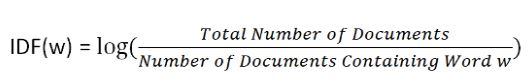

In [ ]:
mapeo2 = reduce.map(lambda x: (x[0][1],(x[0][0],x[1],1)))
mapeo3 = mapeo2.map(lambda x:(x[0],x[1][2]))
reduce2 = mapeo3.reduceByKey(lambda x,y:x+y)
reduce2.collect()

[('protester', 156),
 ('stage', 159),
 ('diein', 152),
 ('protest', 160),
 ('store', 299),
 ('nyc', 169),
 ('anger', 156),
 ('misplace', 155),
 ('retweet', 152),
 ('agree', 163),
 ('apple', 1006),
 ('intraday', 90),
 ('comment', 32),
 ('update', 154),
 ('range', 23),
 ('premium', 32),
 ('user', 58),
 ('aapl', 970),
 ('stockaction', 36),
 ('trading', 45),
 ('stock', 133),
 ('mkt', 41),
 ('ios', 69),
 ('app', 131),
 ('2014', 56),
 ('name', 26),
 ('elevate', 13),
 ('brain', 3),
 ('training', 2),
 ('iphone', 389),
 ('shit', 78),
 ('founder', 10),
 ('attack', 5),
 ('boss', 3),
 ('ridiculous', 4),
 ('ad', 14),
 ('evidence', 7),
 ('factcheckthis', 1),
 ('educate', 2),
 ('hard', 19),
 ('reach', 8),
 ('buy', 74),
 ('suicide', 2),
 ('squad', 1),
 ('comic_strip', 1),
 ('turkey', 2),
 ('delete', 47),
 ('music', 45),
 ('customer', 41),
 ('ipod', 88),
 ('studio', 310),
 ('45,000', 310),
 ('outlet', 310),
 ('computer', 352),
 ('need', 430),
 ('battery', 352),
 ('future', 331),
 ('great', 52),
 ('busi

###*Ahora que ya logramos tener el número de documentos que contienen cada token w, simplemente asignaremos esta salida final con la transformación logarítmica para calcular la puntuación IDF*

In [ ]:
import math
from pyspark.sql.functions import *
idf = reduce2.map(lambda x: (x[0],math.log10(len(dataTwitts)/x[1])))
idf.collect()

[('protester', 1.388142206919209),
 ('stage', 1.3798696809532192),
 ('diein', 1.399423217328898),
 ('protest', 1.377146822617746),
 ('store', 1.105595616949241),
 ('nyc', 1.353380100659997),
 ('anger', 1.388142206919209),
 ('misplace', 1.390935107103379),
 ('retweet', 1.399423217328898),
 ('agree', 1.3690792008697128),
 ('apple', 0.578668824553762),
 ('intraday', 1.6270242958343457),
 ('comment', 2.076116826953765),
 ('update', 1.3937460844372076),
 ('range', 2.2195389692560776),
 ('premium', 2.076116826953765),
 ('user', 1.8178388117107334),
 ('aapl', 0.5944950710074257),
 ('stockaction', 2.0249643045063834),
 ('trading', 1.928054291498327),
 ('stock', 1.457415164306585),
 ('mkt', 1.968482948553935),
 ('ios', 1.7424177145364153),
 ('app', 1.4639955096179063),
 ('2014', 1.8330787782674702),
 ('name', 2.1662934573028525),
 ('elevate', 2.4673234529668338),
 ('brain', 3.104145550554008),
 ('training', 3.2802368096096894),
 ('iphone', 0.9913172039479629),
 ('shit', 1.6891722025831901),
 ('

#Computación TD-IDF   
 * ***TF-IDF***:
    $$tfidf(t,d,D) = tf(t,d) \cdot idf(t,D) = 0,69 * 0,3 = 0,21$$

Ahora tenemos dos RDD, uno con la identificación del documento junto con la frecuencia del término del documento para cada token. Otro RDD que tiene puntuaciones IDF para cada token.



In [ ]:
rdd = tf.join(idf)
rdd.collect()

[('stage', ((1, 1), 1.3798696809532192)),
 ('stage', ((16, 1), 1.3798696809532192)),
 ('stage', ((37, 1), 1.3798696809532192)),
 ('stage', ((51, 1), 1.3798696809532192)),
 ('stage', ((53, 1), 1.3798696809532192)),
 ('stage', ((86, 1), 1.3798696809532192)),
 ('stage', ((90, 1), 1.3798696809532192)),
 ('stage', ((119, 1), 1.3798696809532192)),
 ('stage', ((148, 1), 1.3798696809532192)),
 ('stage', ((224, 1), 1.3798696809532192)),
 ('stage', ((274, 1), 1.3798696809532192)),
 ('stage', ((277, 1), 1.3798696809532192)),
 ('stage', ((279, 1), 1.3798696809532192)),
 ('stage', ((296, 1), 1.3798696809532192)),
 ('stage', ((336, 1), 1.3798696809532192)),
 ('stage', ((338, 1), 1.3798696809532192)),
 ('stage', ((369, 1), 1.3798696809532192)),
 ('stage', ((419, 1), 1.3798696809532192)),
 ('stage', ((425, 1), 1.3798696809532192)),
 ('stage', ((476, 1), 1.3798696809532192)),
 ('stage', ((482, 1), 1.3798696809532192)),
 ('stage', ((491, 1), 1.3798696809532192)),
 ('stage', ((517, 1), 1.3798696809532192

###*Ahora asignaremos esta función para multiplicar los valores TF e IDF de cada token asociado con la identificación del documento respectivo*

In [ ]:
rdd_final = rdd.map(lambda x: (x[1][0][0],(x[0],x[1][0][1],x[1][1],x[1][0][1]*x[1][1]))).sortByKey()
rdd_final.collect()

[(1, ('stage', 1, 1.3798696809532192, 1.3798696809532192)),
 (1, ('protest', 1, 1.377146822617746, 1.377146822617746)),
 (1, ('store', 1, 1.105595616949241, 1.105595616949241)),
 (1, ('nyc', 1, 1.353380100659997, 1.353380100659997)),
 (1, ('anger', 1, 1.388142206919209, 1.388142206919209)),
 (1, ('misplace', 1, 1.390935107103379, 1.390935107103379)),
 (1, ('retweet', 1, 1.399423217328898, 1.399423217328898)),
 (1, ('protester', 1, 1.388142206919209, 1.388142206919209)),
 (1, ('diein', 1, 1.399423217328898, 1.399423217328898)),
 (1, ('agree', 1, 1.3690792008697128, 1.3690792008697128)),
 (2, ('update', 1, 1.3937460844372076, 1.3937460844372076)),
 (2, ('aapl', 1, 0.5944950710074257, 0.5944950710074257)),
 (2, ('stockaction', 1, 2.0249643045063834, 2.0249643045063834)),
 (2, ('apple', 1, 0.578668824553762, 0.578668824553762)),
 (2, ('intraday', 1, 1.6270242958343457, 1.6270242958343457)),
 (2, ('comment', 1, 2.076116826953765, 2.076116826953765)),
 (2, ('range', 1, 2.2195389692560776, 2.

##**Conclusiones**
Podemos observar en nuestros resultados que cada palabra posee
-El id del documento el cual es la fila en la que se encuentra dentro del archivo twitts.txt

* El token ,es decir la palabra

* TF

* IDF

* TF-IDF
